In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/running-analysis/2022-07-16-142643-Running-Abbys AppleWatch.fit


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install fitparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68229 sha256=db8920042b0c564526904700123117c3033784c0299450704191d60afb9cbba5
  Stored in directory: /root/.cache/pip/wheels/23/12/0c/0e80d1da7011f52f94c926a9b72261ef5f0ba38cc60d50cf39
Successfully built fitparse


In [4]:
from fitparse import FitFile
import matplotlib.pyplot as plt

In [5]:
fitfile = FitFile('/kaggle/input/running-analysis/2022-07-16-142643-Running-Abbys AppleWatch.fit')

In [6]:
while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
df = pd.DataFrame(workout)


In [7]:
df.tail()

,distance,heart_rate,timestamp,altitude,cadence,enhanced_altitude,enhanced_speed,fractional_cadence,gps_accuracy,position_lat,position_long,speed,temperature
3504,8003.16,188.0,2022-07-16 21:25:05,1061.6,30.0,1061.6,2.681,0.429688,2.0,609215130.0,-1.361890e+09,2.681,28.0
3505,8005.80,188.0,2022-07-16 21:25:06,1061.6,30.0,1061.6,2.668,0.429688,2.0,609215001.0,-1.361890e+09,2.668,28.0
3506,8008.40,188.0,2022-07-16 21:25:07,1061.6,30.0,1061.6,2.573,0.429688,2.0,609214862.0,-1.361889e+09,2.573,28.0
3507,8010.88,188.0,2022-07-16 21:25:08,1061.6,30.0,1061.6,2.433,0.429688,2.0,609214730.0,-1.361889e+09,2.433,28.0
3508,8013.20,188.0,2022-07-16 21:25:09,1061.6,30.0,1061.6,2.261,0.429688,2.0,609214610.0,-1.361888e+09,2.261,28.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   distance            3509 non-null   float64       
 1   heart_rate          3501 non-null   float64       
 2   timestamp           3509 non-null   datetime64[ns]
 3   altitude            3508 non-null   float64       
 4   cadence             3508 non-null   float64       
 5   enhanced_altitude   3508 non-null   float64       
 6   enhanced_speed      3508 non-null   float64       
 7   fractional_cadence  3508 non-null   float64       
 8   gps_accuracy        3508 non-null   float64       
 9   position_lat        3508 non-null   float64       
 10  position_long       3508 non-null   float64       
 11  speed               3508 non-null   float64       
 12  temperature         3508 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Making first plot for distance
x = df['timestamp']
y = df['heart_rate']
y1 = df['speed']

In [11]:
# Find HR max value
ymax = max(y)
# find the x position of the ymax value
xmax = x[y.argmax()]

In [12]:
print(ymax)
print(xmax)

190.0
2022-07-16 21:23:42


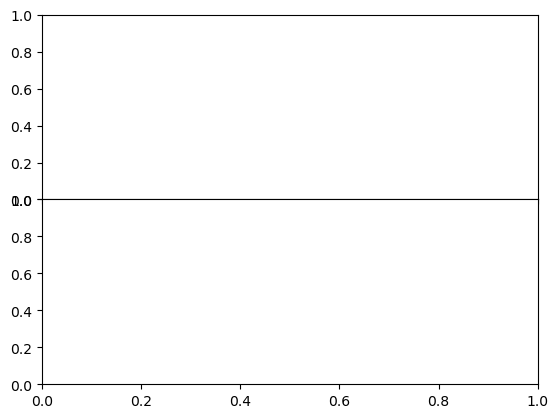

In [13]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)

In [14]:
ax[0].plot(x, y,  label=('$\dot heart_rate$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('bpm'))
ax[0].legend()

In [15]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('speed'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('km/h'))
ax[1].legend()

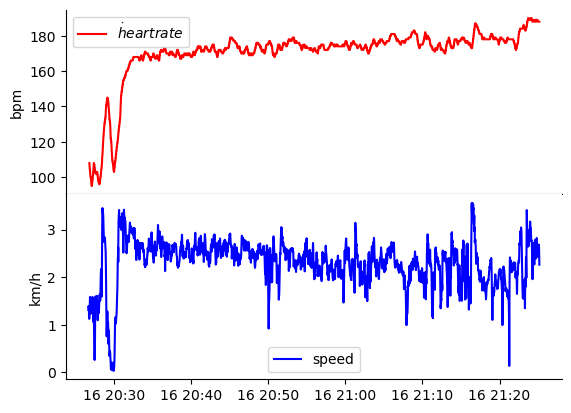

In [16]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2,1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)

ax[0].plot(x, y,  label=('$\dot heartrate$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('bpm'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('speed'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('km/h'))
ax[1].legend()
fig.show()

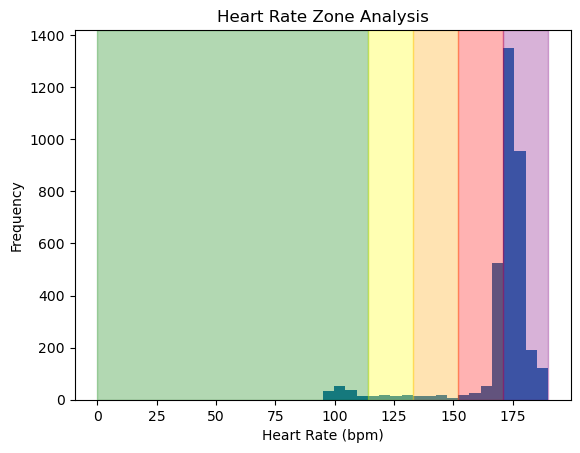

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from fitparse import FitFile

# Load the fit file into a FitFile object
fitfile = FitFile('/kaggle/input/running-analysis/2022-07-16-142643-Running-Abbys AppleWatch.fit')

# Extracting heart rate data from the fit file
hr_data = []
for record in fitfile.get_messages('record'):
    hr = record.get_value('heart_rate')
    if hr:
        hr_data.append(hr)

# Calculate heart rate zones
zone1 = 0.6 * max(hr_data)
zone2 = 0.7 * max(hr_data)
zone3 = 0.8 * max(hr_data)
zone4 = 0.9 * max(hr_data)
zone5 = max(hr_data)

# Plot heart rate histogram
fig, ax = plt.subplots()
ax.hist(hr_data, bins=20)

# Add heart rate zones to the plot
ax.axvspan(0, zone1, alpha=0.3, color='green')
ax.axvspan(zone1, zone2, alpha=0.3, color='yellow')
ax.axvspan(zone2, zone3, alpha=0.3, color='orange')
ax.axvspan(zone3, zone4, alpha=0.3, color='red')
ax.axvspan(zone4, zone5, alpha=0.3, color='purple')

# Set axis labels and title
ax.set_xlabel('Heart Rate (bpm)')
ax.set_ylabel('Frequency')
ax.set_title('Heart Rate Zone Analysis')

# Show the plot
plt.show()
